# Problem Description 

This project is a data collection or data processing solution for gathering text data from images. The objective is to extract text from photographs taken with a mobile phone. More specifically, these images are medals from swimming competitons (see below). Each medal or pin has a stamp with the results of the swimmer, it contains relevant information about the event like: ranking, time, event number, swimmer's category, event type, swimmer's name, swimmer's age, swimmer's team, competition date, and competition name.

The motivation to build this solution is to generate this dataset with swimming results, to be analyzed and tell the story about this swimmer's performance (in this case me). This data also serves for a further project I have in mind about a data analytics project portfolio with some personal touch.

![Medals](img/medal_example.png)

In [16]:
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import os

# Exploratory Data Analysis

In [21]:
images_paths = list(map(lambda x: "medals_png/" + x, os.listdir('medals_png')))
images_paths[:5]

['medals_png/IMG_0438.png',
 'medals_png/IMG_0439.png',
 'medals_png/IMG_0429.png',
 'medals_png/IMG_0428.png',
 'medals_png/IMG_0449.png']

In [22]:
def display_multiple_img(images_paths, rows, cols):
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8) )
    for ind,image_path in enumerate(images_paths):
        image=cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        try:
            ax.ravel()[ind].imshow(image)
            ax.ravel()[ind].set_axis_off()
        except:
            continue;
    plt.tight_layout()
    plt.show()

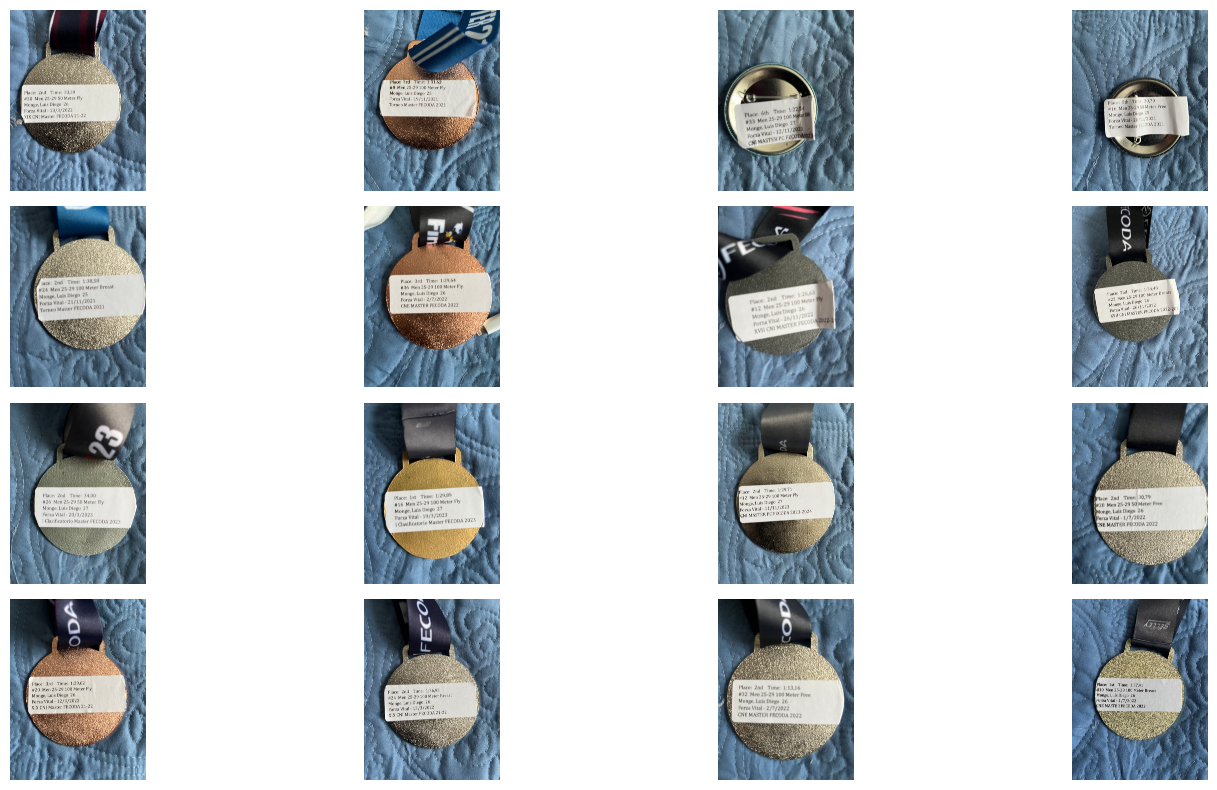

In [23]:
display_multiple_img(images_paths[:16],4,4)

In [24]:
def styling():
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
        plt.xticks([])
        plt.yticks([])

def hist(image_path):
    plt.figure(figsize=(16, 3))
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    plt.subplot(1, 5, 1)
    plt.imshow(img)
    styling()
    
    custom_colors = ["#ef233c", "#76da71", "#2667ff","#aea3b0"]
    labels = ['Red Channel', 'Green Channel', 'Blue Channel','Total']
    
    for i in range(1,4):
        plt.subplot(1, 5, i+1)
        plt.hist(img[:, :, i-1].reshape(-1),bins=64,color=custom_colors[i-1],alpha = 0.6)
        plt.xlabel(labels[i-1],fontsize=10)
        styling()
        
    plt.subplot(1, 5, 5)
    plt.hist(img.reshape(-1),bins=128,color=custom_colors[3],alpha = 0.6)
    plt.xlabel(labels[3],fontsize=10)
    styling()
    plt.show()

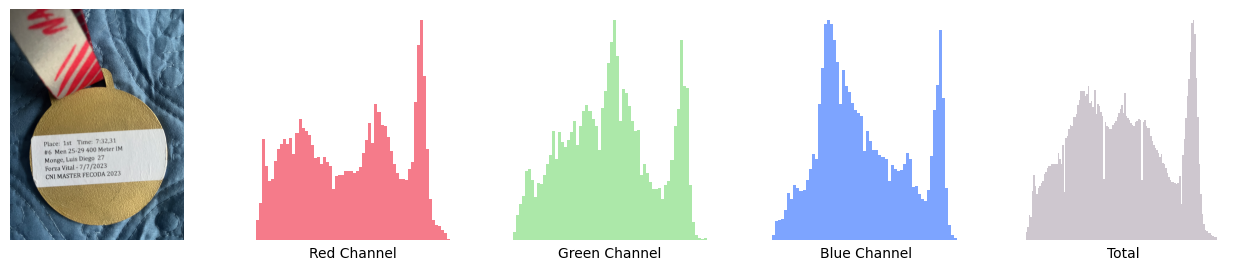

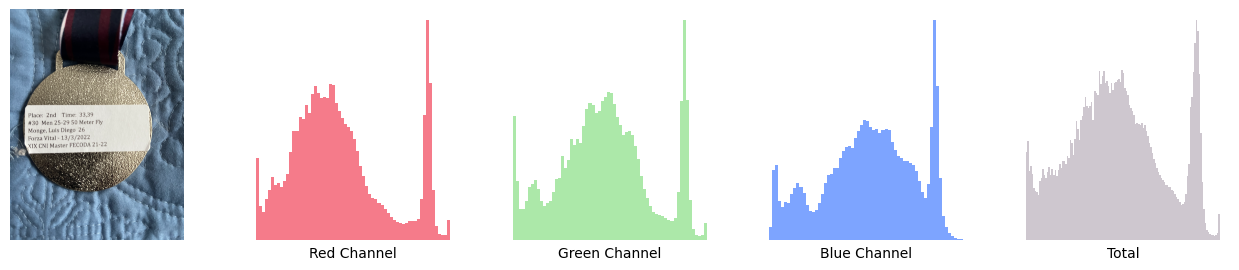

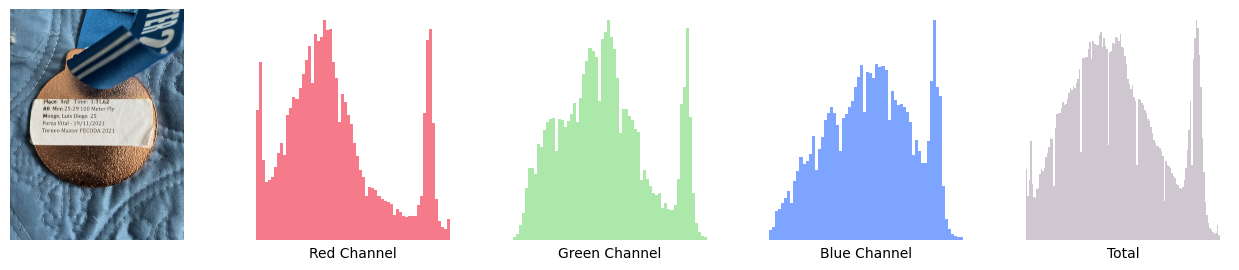

In [28]:
hist(images_paths[-11])
hist(images_paths[0])
hist(images_paths[1])

Note: This amazing color histograms and multiple display image functions were taken from Ruchi Bhatia's [kaggle notebook](https://www.kaggle.com/code/ruchi798/getting-started-with-gans).

In [3]:

# Load an image from file
image = Image.open('medals/IMG_0424.jpeg')
image.show()

In [9]:
png_image_path = 'converted_image.png'
image.save(png_image_path)

In [11]:
image.show()

In [12]:

# Use Tesseract to do OCR on the image
image = Image.open("converted_image.png")
text = pytesseract.image_to_string(image)

# Now 'text' contains the extracted text, which can be used in other parts of your application
print(text)

<<
~
—~
mal

D
ae
=
So
vp
On
NI
’
un
N
S
o
=
=)
or
+

Time:

: 3rd

Place

ly

“
“

lego 25
1/11/2021
ter FECODA 20

D
-2

IS

Monge, Lu

a Vital
Torneo Ma

Forz

21

S




# Analysis

# Results

# Discussion and Conclusion
